In [17]:
# install a virtual environment

!pip install virtualenv

In [18]:
# create a virtual environment

!virtualenv yelp_test

created virtual environment CPython3.10.12.final.0-64 in 639ms
  creator CPython3Posix(dest=/content/yelp_test, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==23.3.1, setuptools==69.0.2, wheel==0.42.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [19]:
# activate a virtual environment

!source /content/yelp_test/bin/activate;

In [20]:
# (optional) install requirements text file

# !pip install -r /content/project1/requirements.txt

In [21]:
# import libraries

# begin with csv import
# it is a built-in Python module

import csv

# the rest

# numpy library, used for linear algebra
import numpy as np

# pandas library, for data processing techniques
import pandas as pd

# plotting libraries

# the most common plotting library, matplotlib
# used for (standard) plot visualization

import matplotlib.pyplot as plt

# as well as seaborn, based on matplotlib
# used for advanced plotting

import seaborn as sns

# classification libraries

# scikit-learn library
# provides all classification types and methods

import sklearn

# LightGBM classifier
from lightgbm import LGBMClassifier

# XGBoost classifier
from xgboost import XGBClassifier

# wordcloud library
# generate word clouds

from wordcloud import WordCloud

# pipelining libraries

# joblib library
# used to perform pipelining processes

import joblib

# warning libraries

# import built-in warnings module

import warnings
warnings.filterwarnings("ignore")

In [22]:
# extra modules import

# train-test split
from sklearn.model_selection import train_test_split

# cross-validation score
from sklearn.model_selection import cross_val_score

# stratified k-fold cross validation
from sklearn.model_selection import StratifiedKFold

# classification report
from sklearn.metrics import classification_report

# confusion matrix and metrics
from sklearn.metrics import confusion_matrix

# metrics
from sklearn.metrics import accuracy_score

# logistic regression
from sklearn.linear_model import LogisticRegression

# decision trees
from sklearn.tree import DecisionTreeClassifier

# KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Naive-Bayes classifier

# using Gaussian Naive-Bayes classifier in this case
from sklearn.naive_bayes import GaussianNB

# also examine with multinomial Naive-Bayes
from sklearn.naive_bayes import MultinomialNB

# support vector machines

# support vector classifier
from sklearn.svm import SVC

# count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# tf-idf metrics

# tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
# read dataframe from URL
# use raw GitHub link

# url = "https://raw.githubusercontent.com/p19pago/information-knowledge-lab-2023/main/projects/proj1/amazon_cells_labelled.csv"

url = "https://raw.githubusercontent.com/p19pago/information-knowledge-lab-2023/main/projects/proj1/yelp_labelled.csv"

# url = "https://raw.githubusercontent.com/p19pago/information-knowledge-lab-2023/main/projects/proj1/imdb_labelled.csv"

# read the dataframe

df = pd.read_csv(url, encoding="ISO-8859-1", names= ["text", "target", "null1", "null2", "null3", "null4", "null5"])

In [24]:
# print head of dataframe

df.head()

,text,target,null1,null2,null3,null4,null5
0,Wow... Loved this place.,1,NaN,NaN,NaN,NaN,NaN
1,Crust is not good.,0,NaN,NaN,NaN,NaN,NaN
2,Not tasty and the texture was just nasty.,0,NaN,NaN,NaN,NaN,NaN
3,Stopped by during the late May bank holiday of...,1,NaN,NaN,NaN,NaN,NaN
4,The selection on the menu was great and so wer...,1,NaN,NaN,NaN,NaN,NaN


In [25]:
# print info of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    1000 non-null   object 
 1   target  1000 non-null   int64  
 2   null1   0 non-null      float64
 3   null2   0 non-null      float64
 4   null3   0 non-null      float64
 5   null4   0 non-null      float64
 6   null5   0 non-null      float64
dtypes: float64(5), int64(1), object(1)
memory usage: 54.8+ KB


In [26]:
# describe dataframe

df.describe()

,target,null1,null2,null3,null4,null5
count,1000.00000,0.0,0.0,0.0,0.0,0.0
mean,0.50000,NaN,NaN,NaN,NaN,NaN
std,0.50025,NaN,NaN,NaN,NaN,NaN
min,0.00000,NaN,NaN,NaN,NaN,NaN
25%,0.00000,NaN,NaN,NaN,NaN,NaN
50%,0.50000,NaN,NaN,NaN,NaN,NaN
75%,1.00000,NaN,NaN,NaN,NaN,NaN
max,1.00000,NaN,NaN,NaN,NaN,NaN


In [27]:
# print dataframe

df

,text,target,null1,null2,null3,null4,null5
0,Wow... Loved this place.,1,NaN,NaN,NaN,NaN,NaN
1,Crust is not good.,0,NaN,NaN,NaN,NaN,NaN
2,Not tasty and the texture was just nasty.,0,NaN,NaN,NaN,NaN,NaN
3,Stopped by during the late May bank holiday of...,1,NaN,NaN,NaN,NaN,NaN
4,The selection on the menu was great and so wer...,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,NaN,NaN,NaN,NaN,NaN
996,Appetite instantly gone.,0,NaN,NaN,NaN,NaN,NaN
997,Overall I was not impressed and would not go b...,0,NaN,NaN,NaN,NaN,NaN
998,The whole experience was underwhelming and I t...,0,NaN,NaN,NaN,NaN,NaN


In [28]:
# shuffle sentences
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [29]:
# preprocess data

# convert text to lowercase
df['text'] = df['text'].str.lower()

# remove punctuation
df['text'] = df['text'].str.replace('[^\w\s]', '')

# remove numbers
df['text'] = df['text'].str.replace('\d+', '', regex=True)

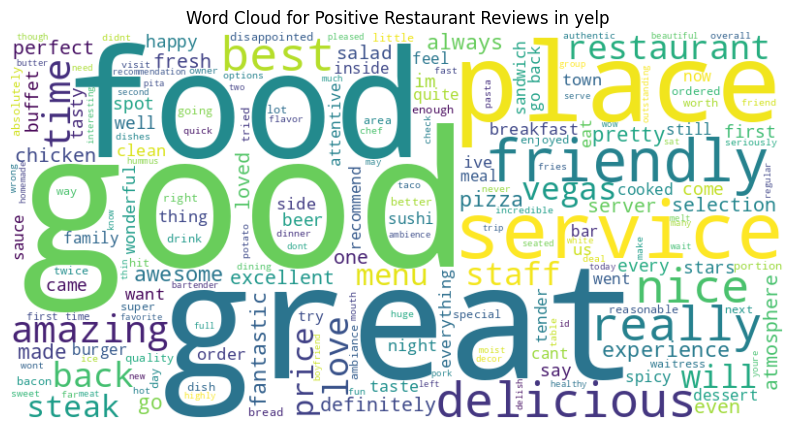

In [30]:
# filter positive reviews
# where target value is set to 1

# Filter the positive yelp reviews (where target == 1)
pos_rev = df[df['target'] == 1]['text'].str.cat(sep=' ')

plt.figure(figsize=(10, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(pos_rev)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Restaurant Reviews in yelp')
plt.axis('off')
plt.show()

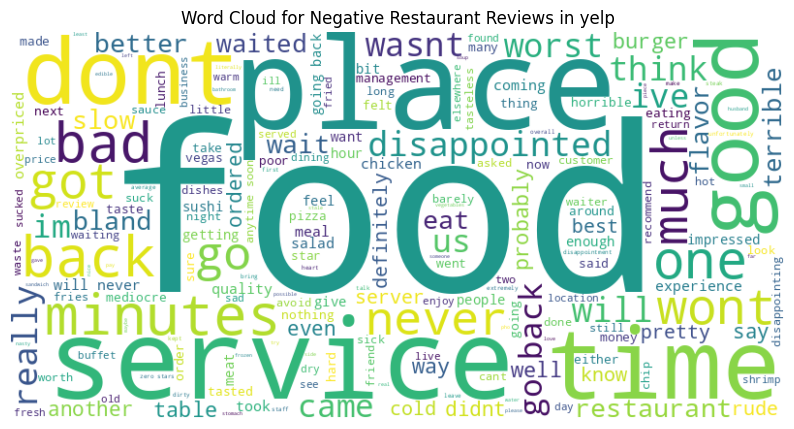

In [32]:
# filter negative reviews
# where target value is set to 0

# Filter the negative yelp reviews (where target == 0)
neg_rev = df[df['target'] == 0]['text'].str.cat(sep=' ')

plt.figure(figsize=(10, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neg_rev)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Restaurant Reviews in yelp')
plt.axis('off')
plt.show()

In [33]:
# alter sample size
# set sample size to 500

samples_per_class = 500
balanced_df = df.groupby('target').apply(lambda x: x.sample(samples_per_class)).reset_index(drop=True)

In [41]:
# split dataframe in train-test sets

X = balanced_df['text']
y = balanced_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [42]:
# use tf-idf to vectorize texts

vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features as needed
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [43]:
# define and train machine learning models

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    # 'LGBM': LGBMClassifier(),
    'XGBoost': XGBClassifier()
}

for name, model in models.items():
    model.fit(X_train_vectorized, y_train)
    predictions = model.predict(X_test_vectorized)
    accuracy = accuracy_score(y_test, predictions)
    print(f'{name} Accuracy: {accuracy}')

Logistic Regression Accuracy: 0.82
Naive Bayes Accuracy: 0.815
KNN Accuracy: 0.78
SVC Accuracy: 0.835
XGBoost Accuracy: 0.785


Saved models:
{}
Saved vectorizer: vectorizer.pkl
Logistic Regression Accuracy: 0.785
Logistic Regression Confusion Matrix:
[[74 20]
 [23 83]]


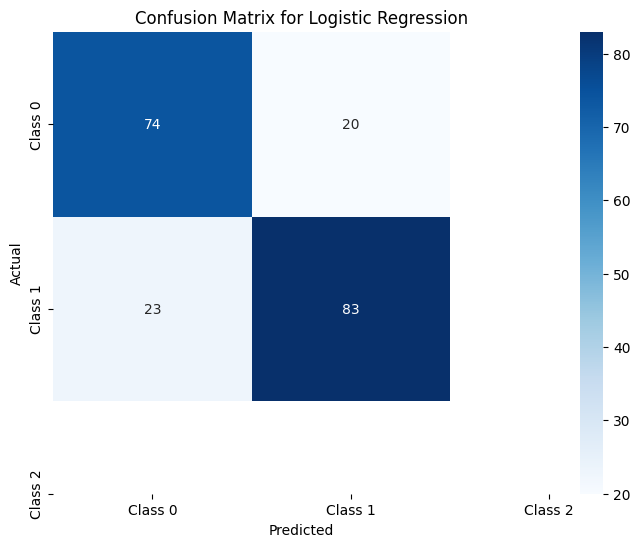

Naive Bayes Accuracy: 0.785
Naive Bayes Confusion Matrix:
[[74 20]
 [23 83]]


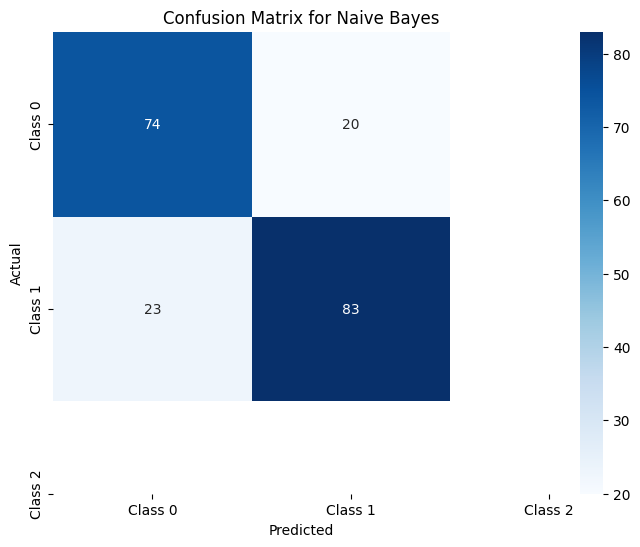

KNN Accuracy: 0.785
KNN Confusion Matrix:
[[74 20]
 [23 83]]


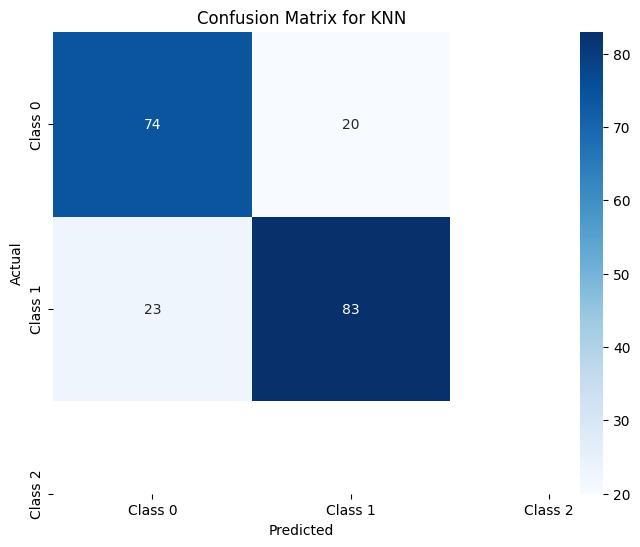

SVC Accuracy: 0.785
SVC Confusion Matrix:
[[74 20]
 [23 83]]


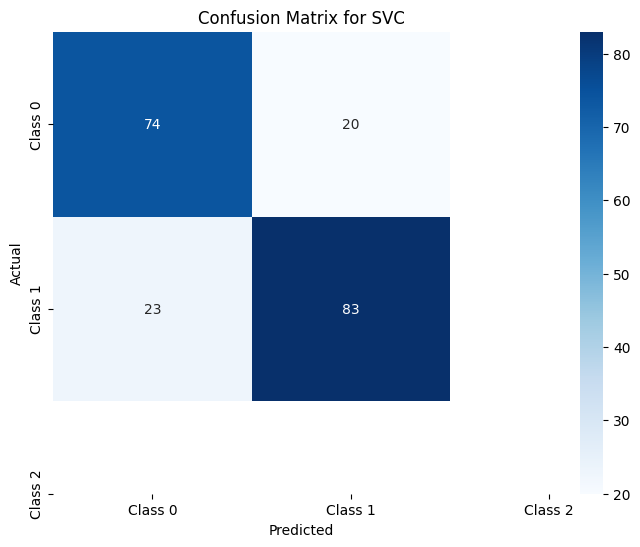

XGBoost Accuracy: 0.785
XGBoost Confusion Matrix:
[[74 20]
 [23 83]]


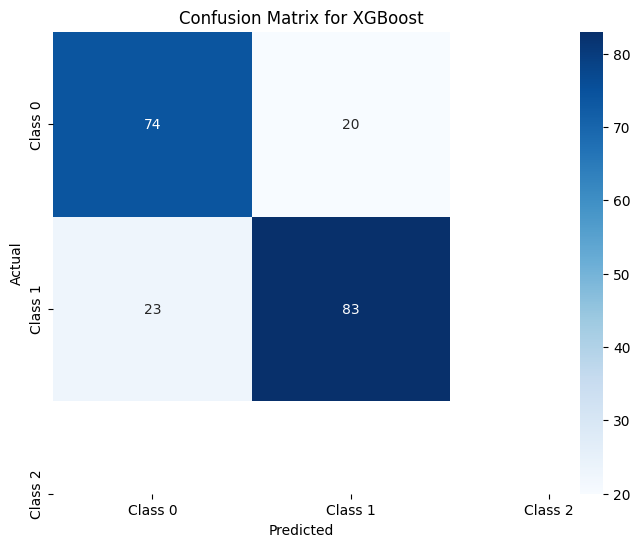

In [44]:
saved_models = {}

# Save the vectorizer
vectorizer_filename = 'vectorizer.pkl'
joblib.dump(vectorizer, vectorizer_filename)

# Print the filenames of the saved models and vectorizer
print("Saved models:")
print(saved_models)
print("Saved vectorizer:", vectorizer_filename)

#Saving the models...
for name, model in models.items():
    # Save the trained model
    model_filename = f'{name}_model.pkl'
    joblib.dump(model, model_filename)
    saved_models[name] = model_filename

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)

    print(f'{name} Accuracy: {accuracy}')
    print(f'{name} Confusion Matrix:')
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()